In [1]:
# Import
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the diabetes dataset to a pandas DataFrame
diabetes = pd.read_csv("diabetes.csv")
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
# Printing the first 5 rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Number of rows and Columns in this dataset
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

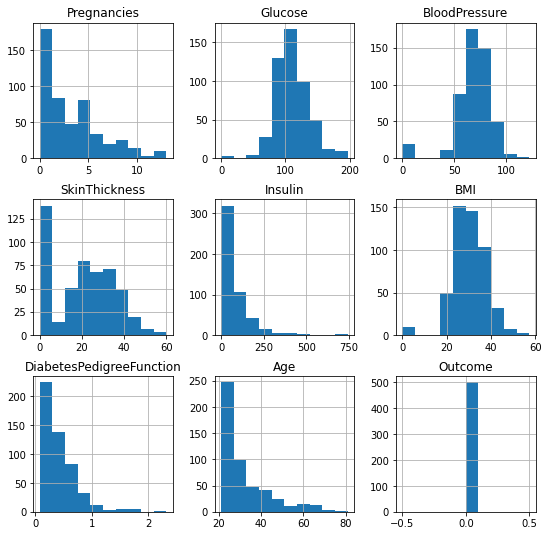

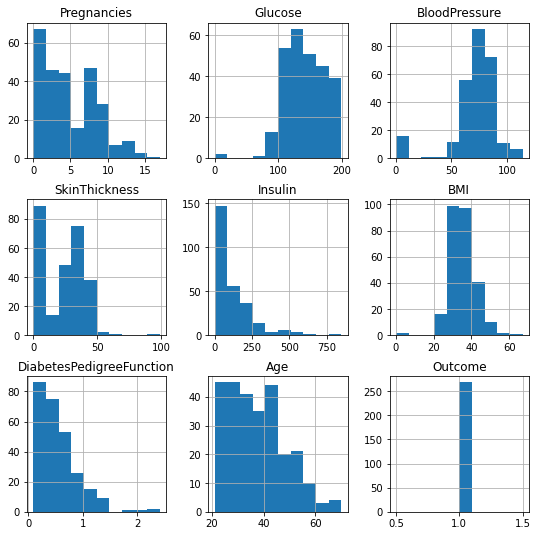

In [5]:
# Visualization of the dataset
diabetes.groupby("Outcome").hist(figsize=(9, 9))

In [6]:
# Missing Data Point Check
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Data Investigation
print("Total Faulty Blood Pressure Data : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print("Total Faulty Blood Glucose Data : ", diabetes[diabetes.Glucose == 0].shape[0])
print("Total Faulty Blood Skin Fold Thickness Data : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print("Total Faulty Blood BMI Data : ", diabetes[diabetes.BMI == 0].shape[0])
print("Total Faulty Blood Insulin Data : ", diabetes[diabetes.Insulin == 0].shape[0])

Total Faulty Blood Pressure Data :  35
Total Faulty Blood Glucose Data :  5
Total Faulty Blood Skin Fold Thickness Data :  227
Total Faulty Blood BMI Data :  11
Total Faulty Blood Insulin Data :  374


In [8]:
# Data Cleaning
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [9]:
# Separating the data and labels
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod.drop(columns="Outcome", axis=1)
y = diabetes_mod["Outcome"]
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
# Standardized Data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)
X = standardized_data

[[ 0.63502182  0.84993279 -0.03237751 ...  0.16456174  0.45842062
   1.41607523]
 [-0.85286102 -1.20026207 -0.51737031 ... -0.85226209 -0.37269083
  -0.19994691]
 [ 1.23017496  1.98892994 -0.67903458 ... -1.33162189  0.59392792
  -0.11489311]
 ...
 [ 0.33744525 -0.02872215 -0.03237751 ... -0.9103663  -0.69188581
  -0.28500071]
 [-0.85286102  0.13399173 -1.00236311 ... -0.34385017 -0.37871338
   1.16091384]
 [-0.85286102 -0.93991986 -0.19404178 ... -0.30027201 -0.48109667
  -0.88037728]]


In [11]:
# Models
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC(random_state=0)))
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))

  Name     Score
0  KNN  0.779006
1  SVC  0.773481
2   LR  0.790055
3   DT  0.751381
4  GNB  0.734807
5   RF  0.779006
6   GB  0.773481


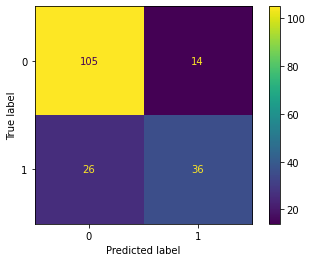

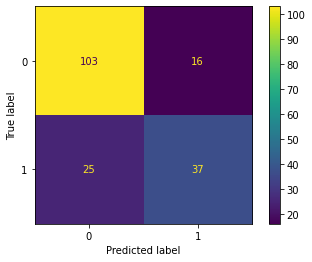

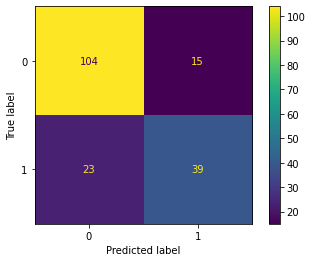

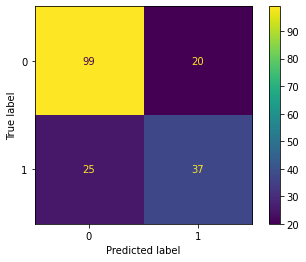

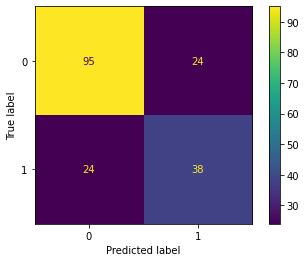

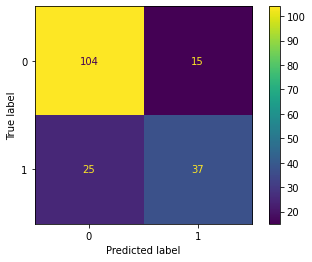

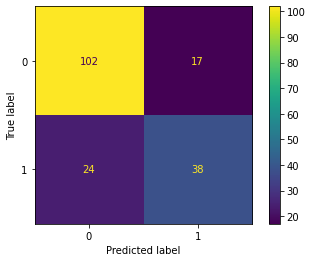

In [12]:
# Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=diabetes_mod.Outcome, random_state=0
)
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
plt.show()

In [13]:
# K-Fold Cross-Validation
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=10)
    score = cross_val_score(model, X, y, cv=kfold, scoring="accuracy").mean()
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({"Name": names, "Score": scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.744387
1  SVC  0.743037
2   LR  0.770757
3   DT  0.696005
4  GNB  0.752683
5   RF  0.776180
6   GB  0.749981


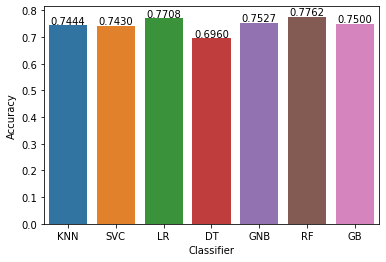

In [14]:
# Plot Accuracy Scores
axis = sns.barplot(x="Name", y="Score", data=kf_cross_val)
axis.set(xlabel="Classifier", ylabel="Accuracy")
for p in axis.patches:
    height = p.get_height()
    axis.text(
        p.get_x() + p.get_width() / 2,
        height + 0.005,
        "{:1.4f}".format(height),
        ha="center",
    )

plt.show()

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


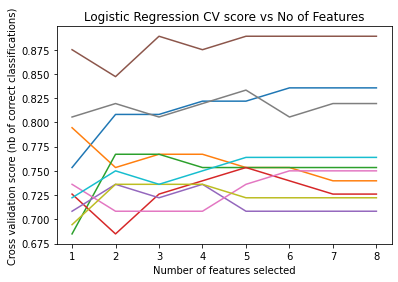

In [15]:
# Plotting Accuracy Vs Number of Features
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=kfold, scoring='accuracy')
rfecv.fit(X, y)
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [16]:
# Important Features Selection
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [17]:
# Accuracy after Feature Selection 
X_new = diabetes_mod[new_features]
fe_score = cross_val_score(logreg_model, X_new, y, cv=kfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Accuracy after Feature Selection : 0.773458904109589 


In [18]:
# Parameter Selection
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]
grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, scoring='accuracy')
grid.fit(X_new, y)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, multi_class='ovr', solver='liblinear')


In [19]:
# Final Accuracy after Parameter Tuning
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')
final_score = cross_val_score(logreg_new, X_new, y, cv=kfold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(final_score))

Final accuracy : 0.7762176560121766 
